In [68]:
from goatools import obo_parser as op
# Holds a GO Directed Acyclic Graph (DAG) as a dict. Дополнительная опция relationship для того, чтобы подтянуть relationships
# из 'go-basic.obo'. По дефолту отключён для оптимизации работы программы
go = op.GODag('go-basic.obo', optional_attrs=['relationship']) 

go-basic.obo: fmt(1.2) rel(2019-05-09) 47,407 GO Terms; optional_attrs(relationship)


In [69]:
# Создаём .csv в формате 'GO id,all_lowers\n' 
with open('descendants_quantity.csv', 'w') as output:
    ids = []
    for id in go:
        # Метод DAGTerm.get_all_lower() возвращает всех детей=потомков(=поля 'relationshipis' + инвертированное 'is_a'
        to_write = id + ',' + str(len(go[id].get_all_lower())) + '\n'
        output.write(to_write)

In [70]:
import pandas as pd
goat_descendants = pd.read_csv('descendants_quantity.csv', sep=',', header=None)
goat_descendants_dict = {}
df = pd.read_csv('6.8_DIRECT.txt', sep='\t')
df = df[df['PValue'] <= 0.05] # Отсев потенциально случайных находок. P-value <= 0.05

In [71]:
# Делаем словарь в формате ключ-GO id, значение- число потомков
for row in goat_descendants.itertuples():
    goat_descendants_dict[row[1]] = row[2]

In [72]:
import numpy as np
# Разделяем столбец Term по тильде '~' и добавляем новообразовавшиеся 2 столбца в конце датафрейма
df[['Id', 'Description']] = df.Term.str.split("~",expand=True)
ass_genes = {}
# Для каждого GO id в goat_descendants находим соответствующее ему число ассоциированных белков и добавляет в словарь по ключу 
# этого GO id. Проверяем, находится ли вообще строка с таким GO id. Если нет - Nan.
# В итоге получаем словарь, где ключи - все последовательно идущие GO id в исходном go-basic.obo, а значения - число ассоц.генов
for id in goat_descendants[0]:
    ass_genes_num = 0 if len(df[df['Id'] == id])==0 else len(df[df['Id'] == id].iloc[0]['Genes'].split(','))
    ass_genes[id] = [ass_genes_num]


In [73]:
# Идём по ключам словаря с ассоц.генами, находим совпадение в df с числом потомков, добавляет в список по ключу число потомков
for key in ass_genes.keys():
    # ass_genes[key].append(goat_descendants[goat_descendants[0]==key].iloc[0][1]) медленно работает. Лучше со словарём
    # По ключу = GO id находим число потомков и добавляем в список
    ass_genes[key].append(goat_descendants_dict[key])

In [74]:
# Удалить Nan. Если они должны быть нулями - то заменить ранее, в предпредыдущей ячейке.
key_list = []
for k, v in ass_genes.items():
    if 'Nan' in v:
        continue
    else:
        key_list.append(k)
# pls noh8, это всё из-за прака по numpy'n'pandas и lambda functions. PS уже не нужно
# david68_ass_genes = pd.DataFrame({'Id': sorted(list(ass_genes.keys())), 'Associatiated genes quantity':[ass_genes[key] for key in sorted(list(ass_genes.keys()))]})

In [75]:
# делаем X-asis для графика. Потомки
x = []
for key in key_list:
    x.append(ass_genes[key][1])
# делаем Y-asis для графика. Ассоц. гены
y = []
for key in key_list:
    y.append(ass_genes[key][0])


In [76]:
from scipy.stats import pearsonr
pearsonr(x, y)


(0.04965071367832317, 2.8626696251454243e-27)

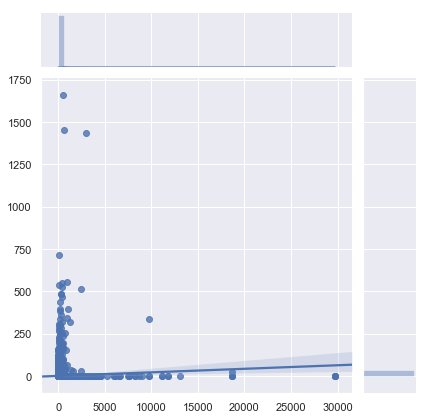

In [77]:
import seaborn as sns
sns.set(style="darkgrid")
#a = concat_david68.dropna()
#tips = sns.load_dataset("tips")
a = sns.jointplot(x,y, kind="reg")
a

In [ ]:
{ "scatter" | "reg" | "resid" | "kde" | "hex" }